# Student T-test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Q. Is the Mean of the sample (1,2,3,4,5) equal to the population mean of 3.5 with confidence level of 95 percentage

In [2]:
# Import t distribution
from scipy.stats import t

In [3]:
sample=np.array([1,2,3,4,5])
print("Sample values",sample)

Sample values [1 2 3 4 5]


Null Hypothesis

$ H_0 : \mu = 3.5 $

Alternative Hypothesis

$ H_1 :\mu \neq 3.5$

In [4]:
pop_mean=3.5
sample_mean=np.mean(sample)
sample_std=np.std(sample,ddof=1)
n=len(sample)
dof=n-1
cl=0.95
significant=0.05
print("Population Mean",pop_mean)
print("No of Samples",n)
print("Sample Mean",sample_mean)
print("Sample Standard Deviation",sample_std)
print("Degree of Freedome",dof)
print("Confidence level",cl)
print("Significant level",significant)

Population Mean 3.5
No of Samples 5
Sample Mean 3.0
Sample Standard Deviation 1.5811388300841898
Degree of Freedome 4
Confidence level 0.95
Significant level 0.05


### To find the T statistics

$\Large t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$

$\bar{x}$ - Sample Mean

$\mu$ - Population Mean

$s$ - Standard deviation of sample

$n$ - Sample size

In [5]:
tstatistics=(sample_mean-pop_mean)/(sample_std/np.sqrt(n))
print("T Statistics is",tstatistics)

T Statistics is -0.7071067811865475


### Calculating T Critical Values

In [6]:
tcritical_l=t.ppf(q=significant/2,df=dof)
tcritical_u=-tcritical_l
print("Critical Values are ",tcritical_l,tcritical_u)

Critical Values are  -2.7764451051977996 2.7764451051977996


In [7]:
if tstatistics<tcritical_l or tstatistics>tcritical_u:
    print("Reject the Null hypothesis")
else:
    print("Fail to reject the Null hypothesis")

Fail to reject the Null hypothesis


In [8]:
pvalue=2*t.cdf(tstatistics,df=dof)
print("pvalue",pvalue)
if pvalue<0.05:
    print("Reject the Null hypothesis")
else:
    print("Fail to reject the Null hypothesis")

pvalue 0.5185185185185183
Fail to reject the Null hypothesis


### Standard Error

$ S.E.=\frac{s}{\sqrt(n)} $

s - Sample SD

n - Number of samples

In [9]:
SE=sample_std/np.sqrt(n)
print("Standard Error",SE)

Standard Error 0.7071067811865476


### Confidence Interval 

$C.I. =\bar{x} \pm SE * Tcritical_\frac{\alpha}{2}$

In [10]:
print("Confidence Interval",sample_mean+(SE)*np.array([tcritical_l,tcritical_u]))

Confidence Interval [1.03675684 4.96324316]


## Plots

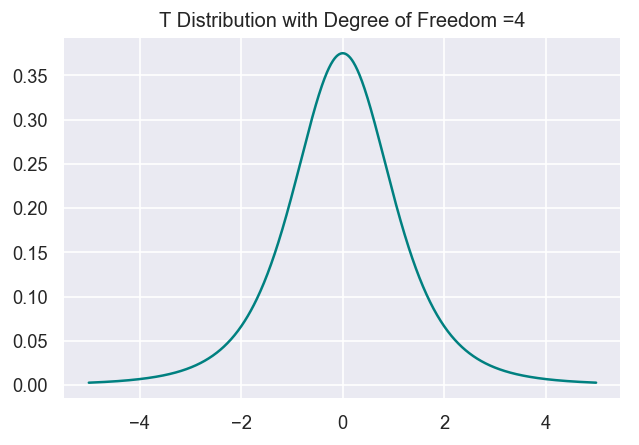

In [11]:
llimit=-5
ulimit=5
x=np.arange(llimit,ulimit,0.01)
y=t.pdf(x=x,df=dof)
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.title("T Distribution with Degree of Freedom ="+str(dof))
plt.show()

In [12]:
#Calculation of Rejection Region
xshade_l=np.arange(llimit,tcritical_l,0.01)
yshade_l=t.pdf(x=xshade_l,df=dof)

xshade_r=np.arange(tcritical_u,ulimit,0.01)
yshade_r=t.pdf(x=xshade_r,df=dof)

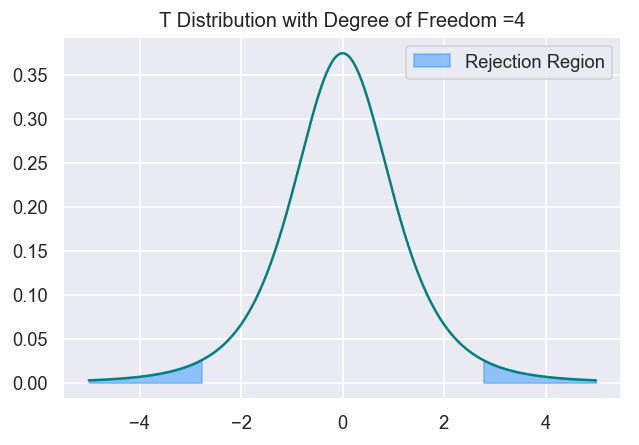

In [13]:
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.title("T Distribution with Degree of Freedom ="+str(dof))
plt.legend()
plt.show()

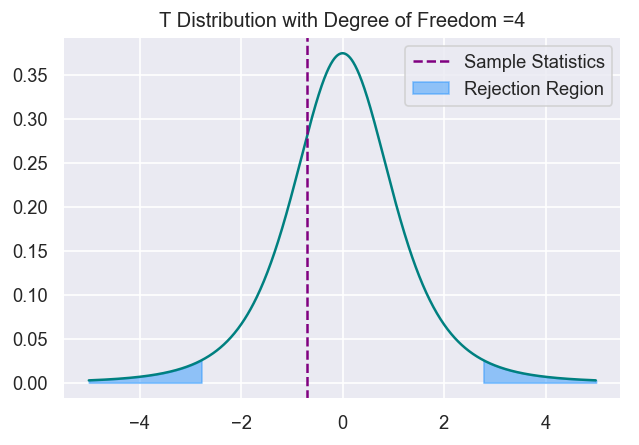

In [14]:
plt.figure(dpi=120)
sns.lineplot(x=x,y=y,color='teal')
plt.fill_between(xshade_l,yshade_l, alpha=0.45, color='dodgerblue',label="Rejection Region")
plt.fill_between(xshade_r,yshade_r, alpha=0.45, color='dodgerblue')
plt.axvline(x=tstatistics, linestyle='--', linewidth=1.5, label="Sample Statistics", c='purple')
plt.title("T Distribution with Degree of Freedom ="+str(dof))
plt.legend()
plt.show()

## Single sample T Test using ttest_1samp method

In [15]:
from scipy.stats import ttest_1samp

In [16]:
tstats,pvalue=ttest_1samp(sample, pop_mean)
print("Test Satistics",tstats)
print("pvalue",pvalue)
if pvalue<0.05:
    print("Reject the Null hypothesis")
else:
    print("Fail to reject the Null hypothesis")

Test Satistics -0.7071067811865475
pvalue 0.5185185185185183
Fail to reject the Null hypothesis


In [17]:
t.interval(0.95,dof,loc=sample_mean,scale=SE)

(1.036756838522439, 4.9632431614775605)

# Using SciPy Package

### One Sample T test

In [18]:
from scipy.stats import ttest_1samp

In [19]:
np.random.seed(123) # fix seed to get the same result
sample1=np.random.normal(5,1,20) # 20 samples following normal with mean 5 and sd 1
print(sample1)

[3.9143694  5.99734545 5.2829785  3.49370529 4.42139975 6.65143654
 2.57332076 4.57108737 6.26593626 4.1332596  4.32111385 4.90529103
 6.49138963 4.361098   4.55601804 4.56564872 7.20593008 7.18678609
 6.0040539  5.3861864 ]


In [20]:
sample1_mean=np.mean(sample1)
print(sample1_mean)

5.114417731955291


In [21]:
#One sample t-test
#To check whether the sample's mean is equal to 5
tstatistics, pvalue = ttest_1samp(sample1, 5)
print("T Statistics",tstatistics)
print("P value",pvalue)

T Statistics 0.4069271634557178
P value 0.6886090948822811


In [22]:
# Same ttest
# Same sample But is its mean equal to 7
np.random.seed(123)
sample1=np.random.normal(5,1,20)
tstatistics, pvalue = ttest_1samp(sample1, 7)
print("T Statistics",tstatistics)
print("P value",pvalue)
if pvalue<0.05:
    print("\nReject the Null Hypothesis")
else:
    print("\nFails to reject the Null Hypothesis")

T Statistics -6.706081572195973
P value 2.071516562764798e-06

Reject the Null Hypothesis


### Two Sampled T test

In [23]:
from scipy.stats import ttest_ind

In [24]:
np.random.seed(12345)
sample1=np.random.normal(4.8,1,20)
sample2=np.random.normal(5.0,1,20)
print("Sample1",sample1)
print("Sample2",sample2)

Sample1 [4.59529234 5.27894334 4.28056128 4.2442697  6.76578057 6.19340583
 4.89290788 5.08174615 5.56902257 6.04643474 5.80718936 3.50377889
 5.07499163 5.02891288 6.15291684 5.68642934 2.79836269 4.42815746
 6.46902531 4.36143026]
Sample2 [4.46025855 5.47698501 8.24894392 3.97877248 4.4229127  5.12412128
 5.30261356 5.52377207 5.00094028 6.34380979 4.28645601 4.16884646
 2.62976835 3.13923921 4.1392426  5.56014529 3.73406551 5.11982712
 3.93648755 5.33288272]


In [25]:
print("Mean of Sample1",np.mean(sample1))
print("Mean of Sample2",np.mean(sample2))

Mean of Sample1 5.11297795308501
Mean of Sample2 4.796504523135516


In [26]:
print("T Statistics",tstatistics)
print("P value",pvalue)

T Statistics -6.706081572195973
P value 2.071516562764798e-06


In [27]:
# Same ttest
# Same sample But with different means
np.random.seed(123)
sample1=np.random.normal(4.7,1,20)
sample2=np.random.normal(5.3,1,20)
print("Mean of Sample1",np.mean(sample1))
print("Mean of Sample2",np.mean(sample2))
tstatistics, pvalue = ttest_ind(sample1,sample2)
print("\nT Statistics",tstatistics)
print("P value",pvalue)
if pvalue<0.05:
    print("\nReject the Null Hypothesis")
else:
    print("\nFails to reject the Null Hypothesis")

Mean of Sample1 4.814417731955291
Mean of Sample2 5.0188216015708464

T Statistics -0.5481788436227369
P value 0.5867752732889268

Fails to reject the Null Hypothesis
